In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

### 1.Data Exploration

In [2]:
#Read Data set
df = pd.read_csv('Processed_Flipdata.csv')
df.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


In [4]:
df.shape

(541, 12)

In [5]:
df.dtypes

Unnamed: 0         int64
Model             object
Colour            object
Memory             int64
RAM                int64
Battery_           int64
Rear Camera       object
Front Camera      object
AI Lens            int64
Mobile Height    float64
Processor_        object
Prize             object
dtype: object

In [6]:
df.columns

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Prize'],
      dtype='object')

### 2.Data Preprocessing

In [7]:
#find Null Values
df.isnull().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [8]:
# null values are not tere in data set

In [9]:
# drop unneccessary columns
df1=df.drop('Unnamed: 0',axis =1)

In [10]:
df1

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


In [11]:
# # Set Seaborn style
# sns.set(style="whitegrid")

# # Get all column names
# all_cols = df1.columns.tolist()
# n_cols = 3  # Number of plots per row
# n_plots = len(all_cols)
# n_rows = math.ceil(n_plots / n_cols)

# # Set figure size
# plt.figure(figsize=(12 * n_cols, 8 * n_rows))

# # Loop through all columns
# for i, col in enumerate(all_cols, 1):
#     plt.subplot(n_rows, n_cols, i)
    
#     if pd.api.types.is_numeric_dtype(df1[col])  :
#         # Plot numeric data
#         sns.histplot(df1[col].dropna(), kde=True, bins=30, color='skyblue')
#     else:
#         # Plot categorical data
#         sns.countplot(x=col, data=df1)
#         plt.xticks(rotation=45, ha='right')
#     plt.title(f'Distribution of {col}', fontsize=12)
#     plt.xlabel(col)
#     plt.ylabel('Frequency')

# plt.tight_layout()
# plt.show()

In [12]:
# Remove 'MP' from camera columns and convert to integer
df1['Rear Camera'] = df1['Rear Camera'].str.replace('MP', '', regex=True).astype(int)
df1['Front Camera'] = df1['Front Camera'].str.replace('MP', '', regex=True).astype(int)

# Remove commas from Prize and convert to numeric
df1['Prize'] = pd.to_numeric(df1['Prize'].str.replace(',', '', regex=True), errors='coerce')

df1

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,1,16.76,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50,12,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,LAVA Z21,Cyan,32,2,3100,5,2,0,12.70,Octa Core,5998
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50,8,0,16.76,MediaTek Helio G35,9990
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50,32,0,16.26,"Exynos 1380, Octa Core",38999


In [13]:
# conver categorical variables into suiable numerical values(one hot encoding)
le = LabelEncoder()
for col in ['Model', 'Colour', 'Processor_']:
    df1[col] = le.fit_transform(df1[col])
df1

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,23,159,64,4,6000,13,5,1,16.76,113,7299
1,23,20,64,4,6000,13,5,1,16.76,113,7299
2,37,149,128,8,5000,50,16,0,16.64,75,11999
3,69,201,32,2,5000,8,5,0,16.56,56,5649
4,12,130,128,8,5000,50,5,1,16.76,14,8999
...,...,...,...,...,...,...,...,...,...,...,...
536,118,49,256,8,3900,50,12,0,15.49,89,79999
537,32,52,32,2,3100,5,2,0,12.70,68,5998
538,123,259,64,4,5000,50,8,0,16.76,35,9990
539,110,17,128,8,5000,50,32,0,16.26,11,38999


In [14]:
df1.dtypes

Model              int32
Colour             int32
Memory             int64
RAM                int64
Battery_           int64
Rear Camera        int32
Front Camera       int32
AI Lens            int64
Mobile Height    float64
Processor_         int32
Prize              int64
dtype: object

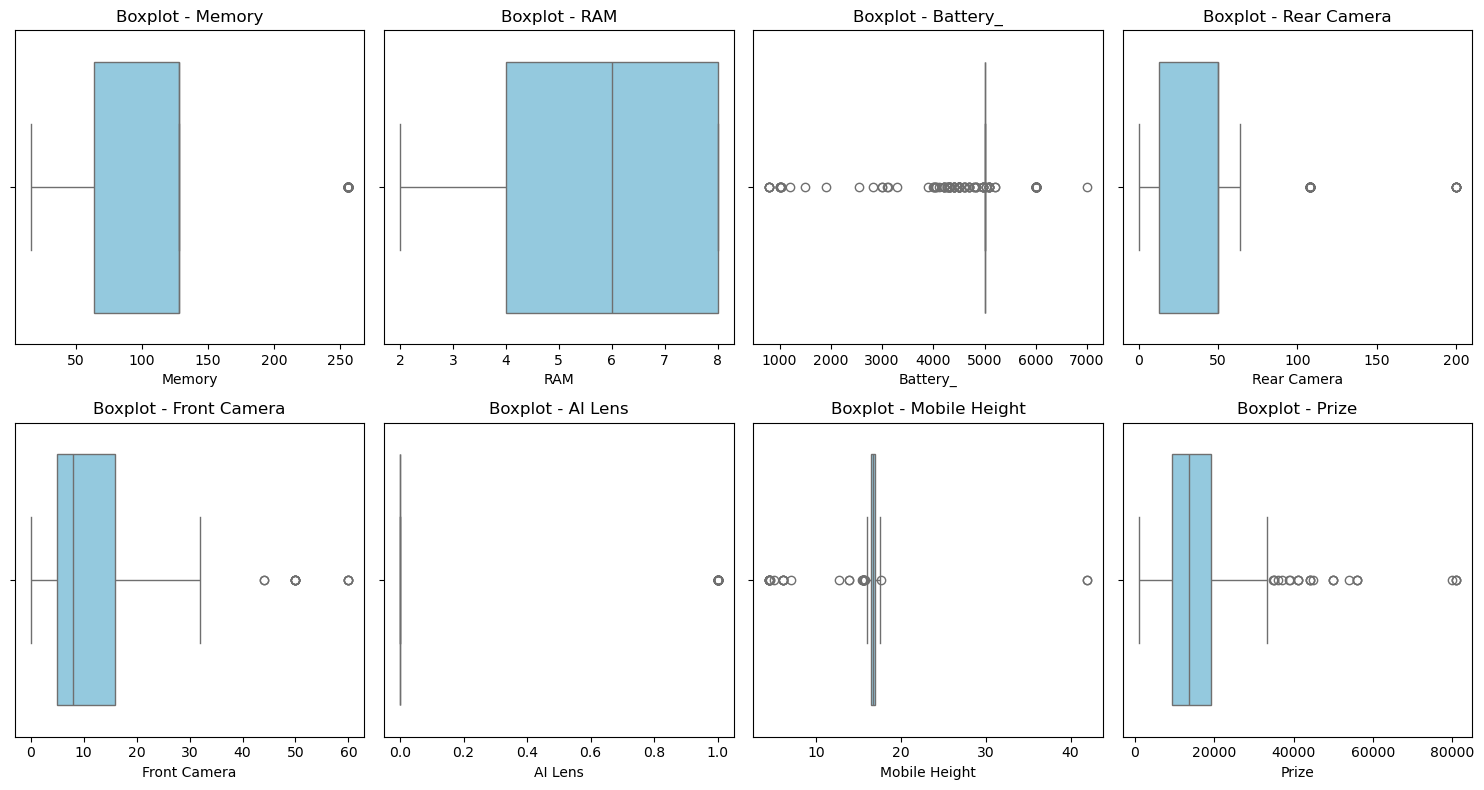

C:\Users\mohan\AppData\Local\Temp\ipykernel_22096\2717633638.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1[col], palette='Set2')
C:\Users\mohan\AppData\Local\Temp\ipykernel_22096\2717633638.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1[col], palette='Set2')
C:\Users\mohan\AppData\Local\Temp\ipykernel_22096\2717633638.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1[col], palette='Set2')


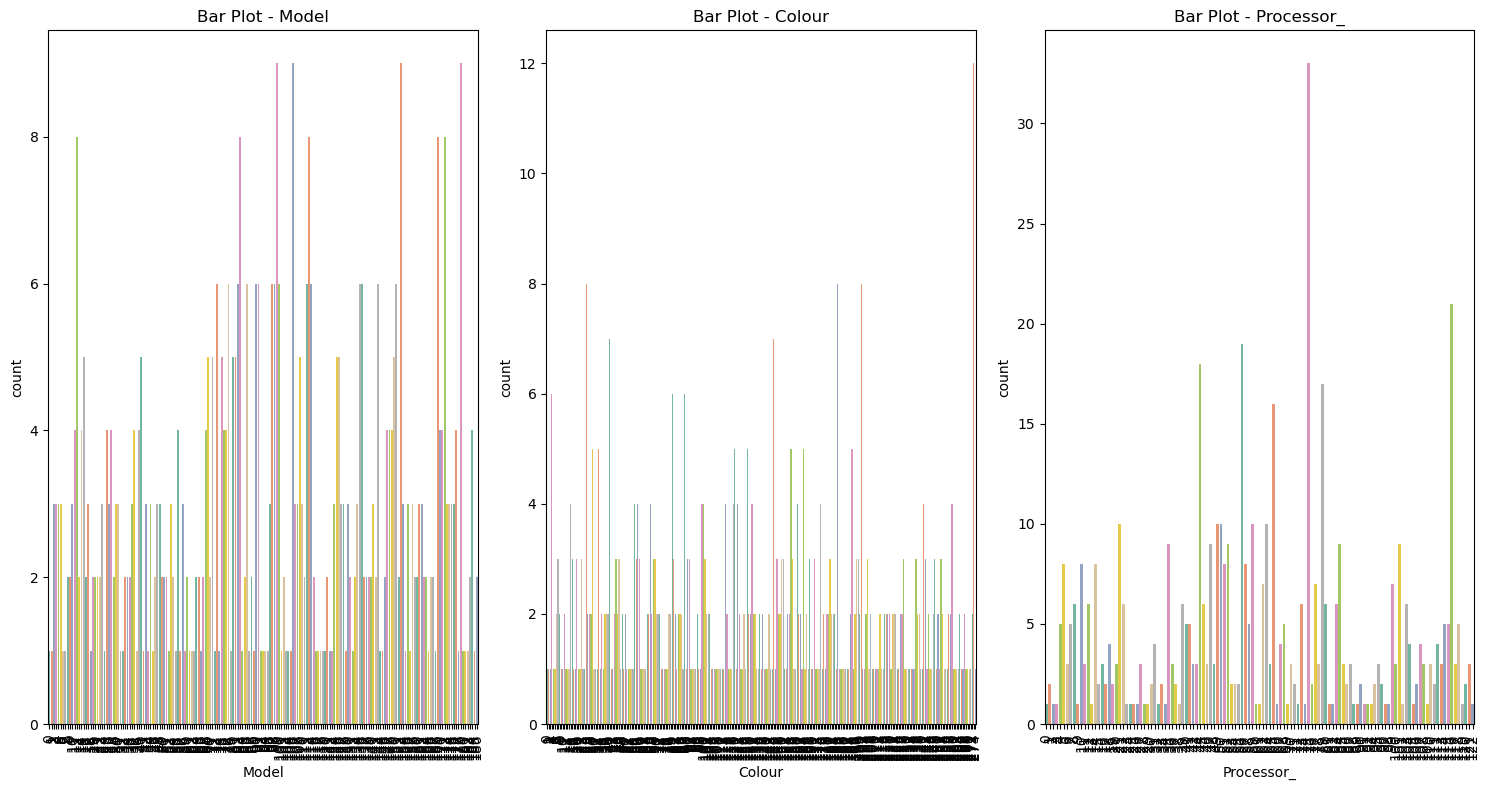

In [15]:
#Find outliers using box plot for numerical and bar plot plot for categorical


#  Separate continuous and categorical columns
categorical_cols = ['Model', 'Colour', 'Processor_']
continuous_cols = [col for col in df1.columns if col not in categorical_cols]

# Boxplots for Continuous Variables (Outlier Detection)
plt.figure(figsize=(15, 8))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(2, (len(continuous_cols) + 1) // 2, i)
    sns.boxplot(x=df1[col], color='skyblue')
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()

# Bar Plots for Categorical Variables
plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, len(categorical_cols), i)
    sns.countplot(x=df1[col], palette='Set2')
    plt.title(f'Bar Plot - {col}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [16]:
# Function to remove outliers using IQR
def remove_outliers_iqr(data, cols):
    df_clean = data.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Remove outliers
df2 = remove_outliers_iqr(df1, continuous_cols)

print(f"Original shape: {df1.shape}")
print(f"After removing outliers: {df2.shape}")


Original shape: (541, 11)
After removing outliers: (308, 11)


### 3.Feature Extraction

In [17]:
df2['Total_Camera_MP'] = df2['Rear Camera'] + df2['Front Camera']
df2['Rear_to_Front_Cam_Ratio'] = df2['Rear Camera'] / (df2['Front Camera'] + 1)
df2['Performance_Score'] = df2['RAM'] * df2['Memory']
df2['Battery_per_Height'] = df2['Battery_'] / df2['Mobile Height']
df2['Memory_per_Price'] = df2['Memory'] / df2['Prize']
df2['RAM_per_Price'] = df2['RAM'] / df2['Prize']
df2

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,Total_Camera_MP,Rear_to_Front_Cam_Ratio,Performance_Score,Battery_per_Height,Memory_per_Price,RAM_per_Price
2,37,149,128,8,5000,50,16,0,16.64,75,11999,66,2.941176,1024,300.480769,0.010668,0.000667
3,69,201,32,2,5000,8,5,0,16.56,56,5649,13,1.333333,64,301.932367,0.005665,0.000354
14,111,169,64,4,5000,13,5,0,16.51,65,7299,18,2.166667,256,302.846760,0.008768,0.000548
15,70,201,64,4,5000,8,5,0,16.56,19,6999,13,1.333333,256,301.932367,0.009144,0.000572
17,70,186,64,4,5000,8,5,0,16.56,19,6999,13,1.333333,256,301.932367,0.009144,0.000572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,105,177,128,6,5000,50,8,0,16.76,13,16499,58,5.555556,768,298.329356,0.007758,0.000364
534,55,96,64,4,5000,50,8,0,16.55,68,9790,58,5.555556,256,302.114804,0.006537,0.000409
535,104,119,64,3,5000,13,5,0,16.51,65,9999,18,2.166667,192,302.846760,0.006401,0.000300
538,123,259,64,4,5000,50,8,0,16.76,35,9990,58,5.555556,256,298.329356,0.006406,0.000400


Prize                      1.000000
Performance_Score          0.799331
RAM                        0.768533
Memory                     0.761900
Front Camera               0.700052
Total_Camera_MP            0.688887
Rear Camera                0.635649
Mobile Height              0.300951
Model                      0.174530
Rear_to_Front_Cam_Ratio    0.169856
Colour                     0.109108
Memory_per_Price          -0.011356
Processor_                -0.069539
RAM_per_Price             -0.250478
Battery_per_Height        -0.299731
Battery_                        NaN
AI Lens                         NaN
Name: Prize, dtype: float64


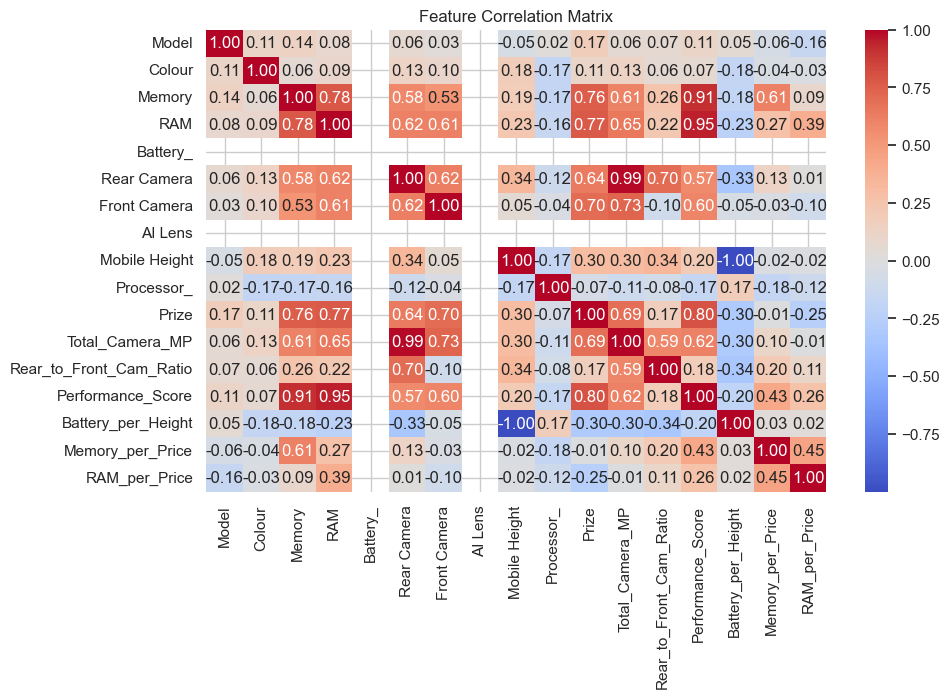

In [54]:
#Correlation Matrix & Heatmap
# Compute correlation matrix
corr_matrix = df2.corr(numeric_only=True)

# Display correlation with Prize only
print(corr_matrix['Prize'].sort_values(ascending=False))

# Plot Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [19]:
df2.isnull().sum()

Model                      0
Colour                     0
Memory                     0
RAM                        0
Battery_                   0
Rear Camera                0
Front Camera               0
AI Lens                    0
Mobile Height              0
Processor_                 0
Prize                      0
Total_Camera_MP            0
Rear_to_Front_Cam_Ratio    0
Performance_Score          0
Battery_per_Height         0
Memory_per_Price           0
RAM_per_Price              0
dtype: int64

###  Univariate Analysis

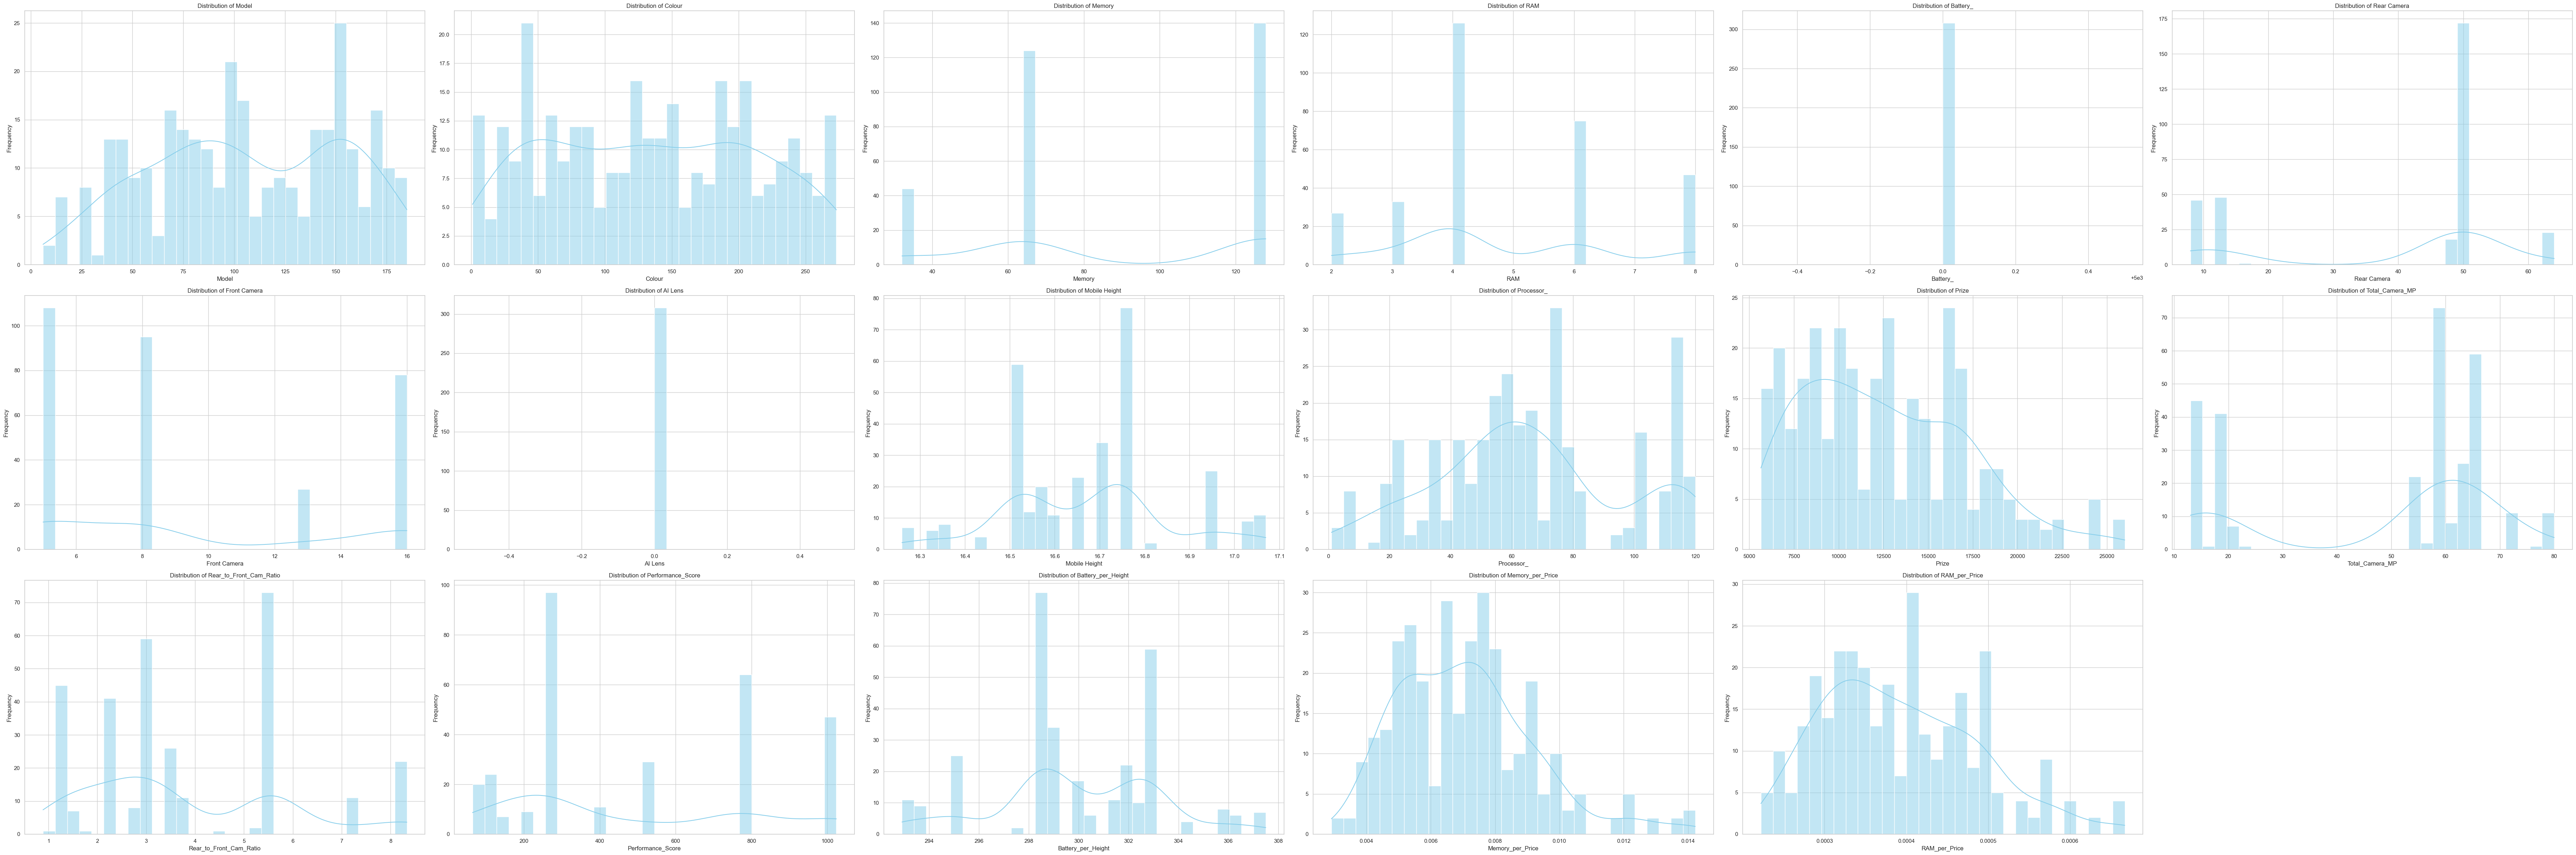

In [20]:
# Set Seaborn style
sns.set(style="whitegrid")

# Get all column names
all_cols = df2.columns.tolist()
n_cols = 6  # Number of plots per row
n_plots = len(all_cols)
n_rows = math.ceil(n_plots / n_cols)

# Set figure size
plt.figure(figsize=(12 * n_cols, 8 * n_rows))

# Loop through all columns
for i, col in enumerate(all_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    if pd.api.types.is_numeric_dtype(df2[col]):
        # Plot numeric data
        sns.histplot(df2[col].dropna(), kde=True, bins=30, color='skyblue')
    else:
        # Plot categorical data
        sns.countplot(x=col, data=df2)
        plt.xticks(rotation=45, ha='right')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Bivariate Analysis

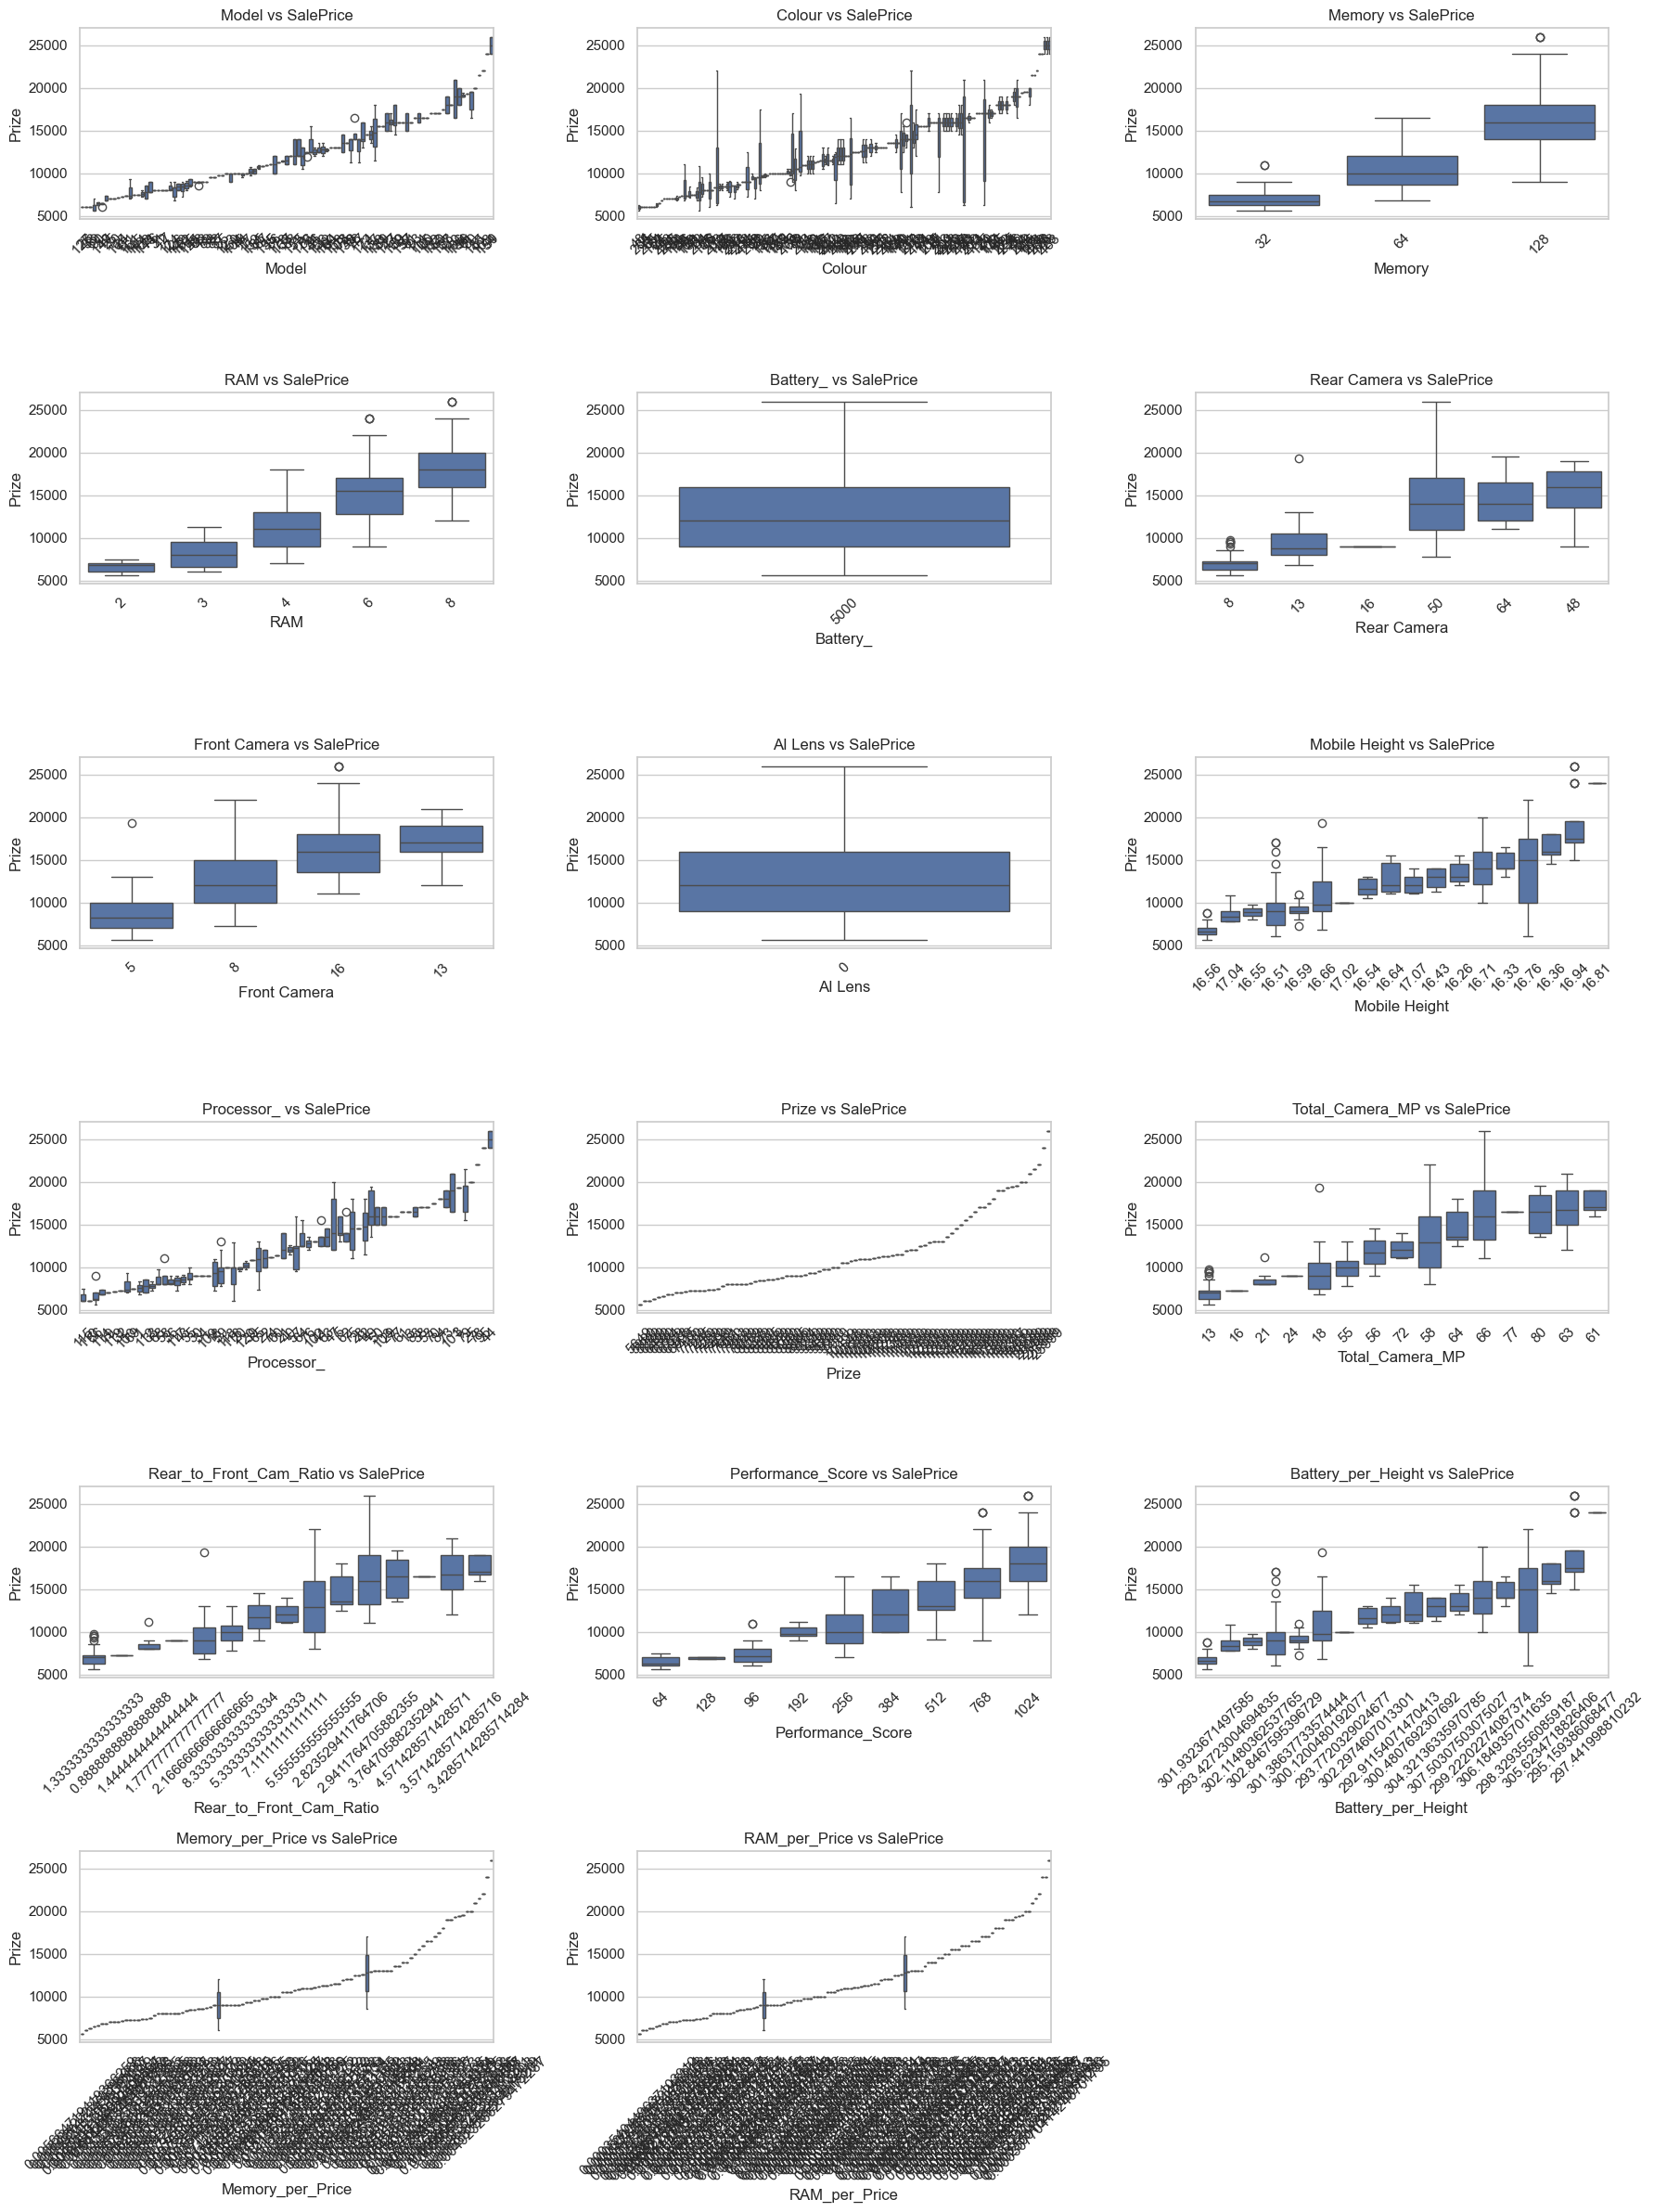

In [21]:
n_cols = 3
n_plots = len(all_cols)
n_rows = math.ceil(n_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()
for i, col in enumerate(all_cols):
    ax = axes[i]
    order = df2.groupby(col)['Prize'].median().sort_values().index
    sns.boxplot(data=df2, x=col, y='Prize', order=order, ax=ax)
    ax.set_title(f"{col} vs SalePrice")
    ax.tick_params(axis='x', rotation=45)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()


### 4.Features Selection

In [22]:
selected_features = [
    'Performance_Score',
    'RAM',
    'Memory',
    'Front Camera',
    'Total_Camera_MP',
    'Rear Camera',
    'Mobile Height'
]
target = 'Prize'

### 5. Model Building and Evaluation

In [23]:
X = df2[selected_features]
y = df2[target]

# ======== Train/Test Split ========
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1.Linear Regression

In [24]:
# Start LinearRegression
from sklearn.linear_model import LinearRegression
model_LR= LinearRegression()
model_LR

LinearRegression()

In [25]:
model_LR.fit(X_train,y_train)

LinearRegression()

In [26]:
y_pred_LR = model_LR.predict(X_test)
y_pred_LR

array([11898.19295256, 15978.596104  , 13385.74367488, 12505.12926975,
        8591.37800786, 10793.79863863, 14795.2253082 , 10752.98814417,
       19888.66055164, 17548.16169188, 11560.34103879,  7005.75641498,
        6417.35840128,  8151.07080529,  8949.42586195, 11898.19295256,
        6641.13831008, 17562.46387584, 11543.70182692,  7710.76360273,
       16666.36506843,  7536.2579453 , 14519.05711608,  8285.33875058,
       13798.14012685,  7082.32236934, 18968.63540825, 10793.79863863,
       14932.46427613,  8555.62254796, 14441.6516114 ,  8779.40245676,
       19206.71750102,  7175.77982016, 14795.2253082 ,  7710.76360273,
        6781.97650617, 11228.03544447, 11017.57854743,  8855.96841113,
        6781.97650617,  9898.67900341,  8855.96841113, 18759.15768341,
        7489.07169249, 13798.14012685,  8793.90768686, 15978.596104  ,
       15229.46211404,  6641.13831008, 15019.005217  ,  6417.35840128,
       17192.69832177, 14441.6516114 , 18759.15768341, 12755.42953457,
      

In [27]:
df_LR = pd.DataFrame({'Actual':y_test.values,'pred':y_pred_LR.round(2)}).reset_index(drop=True)
df_LR

,Actual,pred
0,9999,11898.19
1,15999,15978.60
2,11999,13385.74
3,10999,12505.13
4,7299,8591.38
...,...,...
57,8495,11017.58
58,9290,11017.58
59,8288,9262.72
60,6999,8793.91


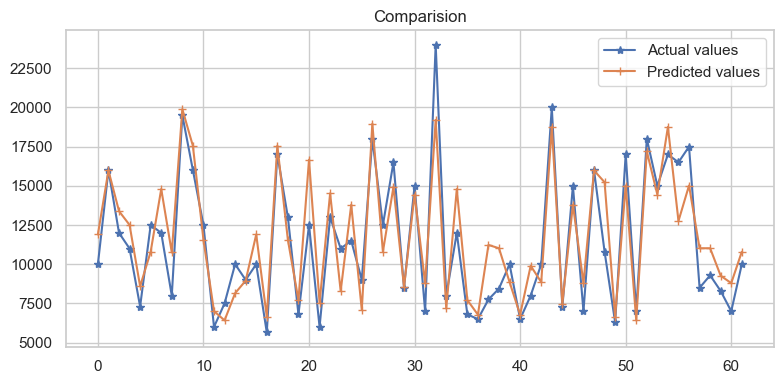

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(df_LR['Actual'], label='Actual values', marker='*')
plt.plot(df_LR['pred'], label='Predicted values', marker='+')
plt.title("Comparision")

plt.legend()
plt.tight_layout()

plt.show()

In [29]:
#calculate Result and  analysis

from sklearn.metrics import mean_squared_error, r2_score

mse_LR = mean_squared_error(y_test, y_pred_LR)
rmse_LR = np.sqrt(mse_LR)
r2_LR = r2_score(y_test, y_pred_LR)
cv_score_LR = np.mean(cross_val_score(model_LR, X, y, cv=5))

print(f"Linear Regression - Mean Squared Error: {mse_LR}")
print(f"Linear Regression - Root Mean Squared Error: {rmse_LR}")
print(f"Linear Regression - R² Score: {r2_LR}")
print(f"Gradient Boosting Regression - CV Score: {cv_score_LR}")

Linear Regression - Mean Squared Error: 3529287.626356601
Linear Regression - Root Mean Squared Error: 1878.6398341237739
Linear Regression - R² Score: 0.8059936544651521
Gradient Boosting Regression - CV Score: 0.6479429425869577


### 2.Random Forest Regression 


In [30]:
model_RF = RandomForestRegressor(n_estimators=100, random_state=42)
model_RF

RandomForestRegressor(random_state=42)

In [31]:
model_RF.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [32]:
y_pred_RF = model_RF.predict(X_test)
y_pred_RF

array([10316.92224359, 15980.26771479, 12075.587     , 11169.14865873,
        7527.99685714, 11465.66849817, 13976.83918696,  8502.42286508,
       19534.        , 18305.35714286, 12530.49917857,  6410.16677489,
        6828.09079365,  8076.70209524,  9021.5       , 10316.92224359,
        6252.66096825, 17393.        , 12653.95833333,  7293.48166667,
       13804.        ,  5997.31639635, 14826.09090909, 10855.64      ,
       12142.45515568,  9136.8       , 18713.3728254 , 11465.66849817,
       16099.        ,  8780.32794841, 15430.25      ,  8063.18641667,
       22345.13339105,  8338.17      , 13976.83918696,  7293.48166667,
        6936.55833333,  8079.8435    , 11649.302804  , 10019.        ,
        6936.55833333,  8568.82142857, 10019.        , 18406.04063276,
        7243.46      , 12142.45515568,  7025.474     , 15980.26771479,
        9491.        ,  6252.66096825, 18503.13120172,  6828.09079365,
       17479.        , 15430.25      , 18406.04063276, 15656.30717949,
      

In [33]:
df_RF = pd.DataFrame({'Actual':y_test.values,'pred':y_pred_RF.round(2)}).reset_index(drop=True)
df_RF

,Actual,pred
0,9999,10316.92
1,15999,15980.27
2,11999,12075.59
3,10999,11169.15
4,7299,7528.00
...,...,...
57,8495,11649.30
58,9290,11649.30
59,8288,8652.57
60,6999,7025.47


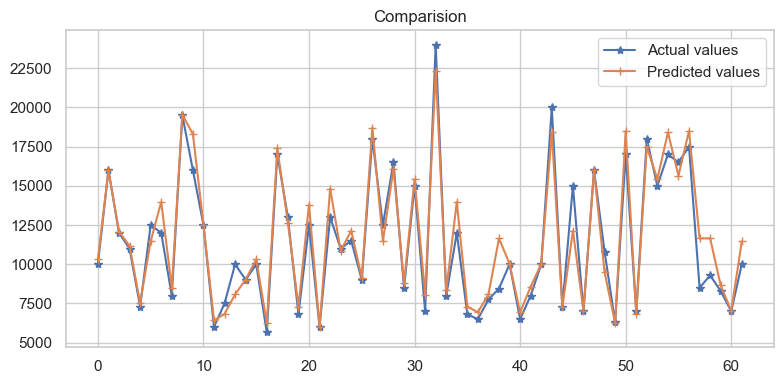

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(df_RF['Actual'], label='Actual values', marker='*')
plt.plot(df_RF['pred'], label='Predicted values', marker='+')
plt.title("Comparision")

plt.legend()
plt.tight_layout()

plt.show()

In [35]:
#calculate Result and  analysis

from sklearn.metrics import mean_squared_error, r2_score

mse_RF = mean_squared_error(y_test, y_pred_RF)
rmse_RF = np.sqrt(mse_RF)
r2_RF = r2_score(y_test, y_pred_RF)
cv_score_RF = np.mean(cross_val_score(model_RF, X, y, cv=5))

print(f"Random Froest Regression- Mean Squared Error: {mse_RF}")
print(f"Random Froest Regression - Root Mean Squared Error: {rmse_RF}")
print(f"Random Froest Regression - R² Score: {r2_RF}")
print(f"Gradient Boosting Regression - CV Score: {cv_score_RF}")

Random Froest Regression- Mean Squared Error: 1280729.496258196
Random Froest Regression - Root Mean Squared Error: 1131.693198821216
Random Froest Regression - R² Score: 0.9295977898394633
Gradient Boosting Regression - CV Score: 0.7040094454828427


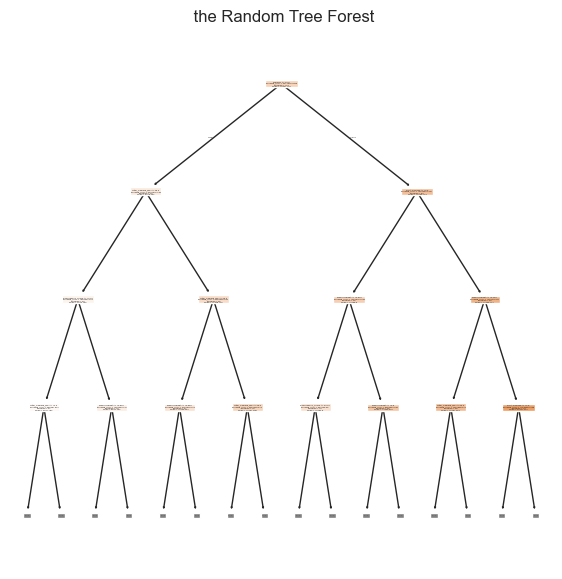

In [36]:
from sklearn.tree import plot_tree
# Plot the first tree from the forest
plt.figure(figsize=(7,7))
plot_tree(model_RF.estimators_[0], feature_names=X.columns, filled=True, max_depth=3)  # limit depth for clarity
plt.title(" the Random Tree Forest")
plt.show()

### 3.Gradient Boosting Regression

In [37]:
model_GB = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_GB

GradientBoostingRegressor(random_state=42)

In [38]:
model_GB.fit(X_train,y_train)

GradientBoostingRegressor(random_state=42)

In [39]:
y_pred_GB = model_GB.predict(X_test)
y_pred_GB

array([11871.31576138, 16718.63568111, 11734.5358637 , 11296.30663965,
        8382.61461261, 11146.24668299, 14828.43556903,  9040.19179714,
       19569.2947039 , 18392.0963094 , 12166.76908489,  6705.44191975,
        6614.68694249,  8382.61461261,  8848.38732594, 11871.31576138,
        6477.57257603, 18882.52042313, 12527.2911192 ,  7218.04142889,
       14497.29862363,  6342.4784459 , 14669.53684442, 11049.45297284,
       12632.07614253,  9653.8306836 , 18852.71023426, 11146.24668299,
       15076.68010944,  8186.80421837, 14577.92305068,  8472.93738233,
       23979.25888206,  7602.95723423, 14828.43556903,  7218.04142889,
        6842.55628622,  8020.1846501 , 11433.08653733,  9809.56418322,
        6842.55628622,  9305.82577052,  9809.56418322, 17990.23199718,
        7689.97545408, 12632.07614253,  6933.36344224, 16718.63568111,
        9155.22502683,  6477.57257603, 17185.28875702,  6614.68694249,
       17470.94718763, 14577.92305068, 17990.23199718, 14516.2826843 ,
      

In [40]:
df_GB = pd.DataFrame({'Actual':y_test.values,'pred':y_pred_GB.round(2)}).reset_index(drop=True)
df_GB

,Actual,pred
0,9999,11871.32
1,15999,16718.64
2,11999,11734.54
3,10999,11296.31
4,7299,8382.61
...,...,...
57,8495,11433.09
58,9290,11433.09
59,8288,9377.43
60,6999,6933.36


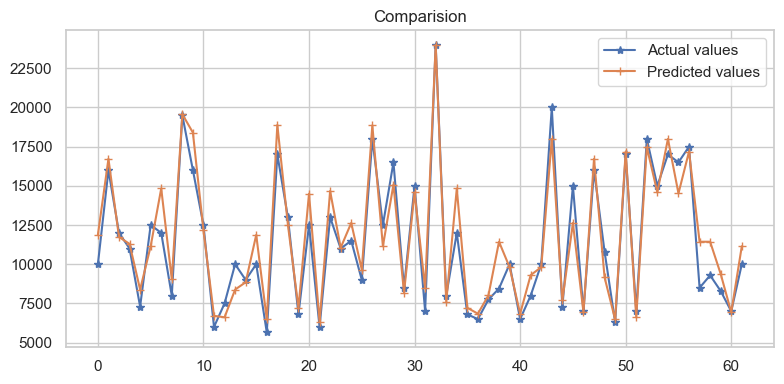

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(df_GB['Actual'], label='Actual values', marker='*')
plt.plot(df_GB['pred'], label='Predicted values', marker='+')
plt.title("Comparision")

plt.legend()
plt.tight_layout()

plt.show()

In [42]:
#calculate Result and  analysis

from sklearn.metrics import mean_squared_error, r2_score

mse_GB = mean_squared_error(y_test, y_pred_GB)
rmse_GB = np.sqrt(mse_GB)
r2_GB = r2_score(y_test, y_pred_GB)
cv_score_GB = np.mean(cross_val_score(model_GB, X, y, cv=5))

print(f"Gradient Boosting Regression- Mean Squared Error: {mse_GB}")
print(f"Gradient Boosting Regression - Root Mean Squared Error: {rmse_GB}")
print(f"Gradient Boosting Regression - R² Score: {r2_GB}")
print(f"Gradient Boosting Regression - CV Score: {cv_score_GB}")


Gradient Boosting Regression- Mean Squared Error: 1670850.4724658555
Gradient Boosting Regression - Root Mean Squared Error: 1292.6138141246424
Gradient Boosting Regression - R² Score: 0.9081526845028182
Gradient Boosting Regression - CV Score: 0.7801248326626953


In [43]:
### Decision Tree Regression

In [44]:
from sklearn.tree import DecisionTreeRegressor

model_DT = DecisionTreeRegressor(random_state=42)
model_DT

DecisionTreeRegressor(random_state=42)

In [45]:
model_DT.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

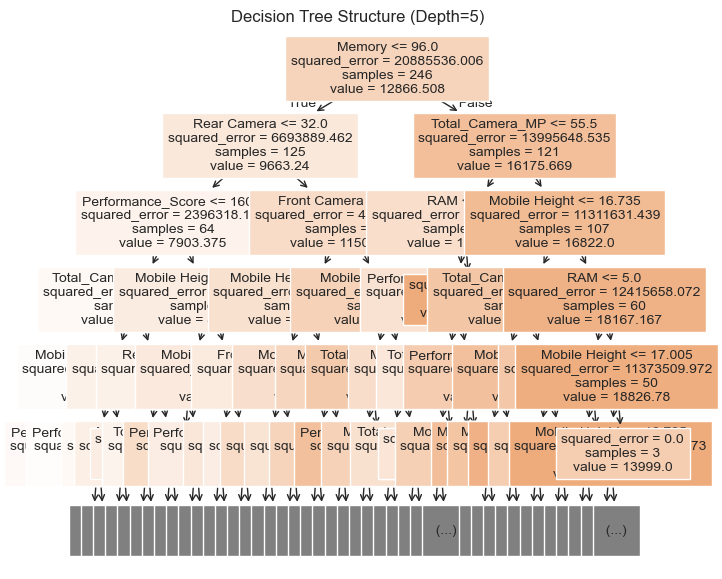

In [46]:
#plot Tree Diagram(EDA)
plt.figure(figsize=(7,7))
plot_tree(model_DT, feature_names=X.columns, filled=True, fontsize=10,max_depth=5)
plt.title("Decision Tree Structure (Depth=5)")
plt.show()

In [47]:
# Make predictions
y_pred_DT = model_DT.predict(X_test)
y_pred_DT

array([ 9999.        , 15999.        , 11999.        , 11209.25      ,
        7464.5       , 11415.66666667, 13943.44444444,  8069.        ,
       19499.        , 18249.        , 12499.        ,  6399.        ,
        6836.5       ,  7464.5       ,  8999.        ,  9999.        ,
        6311.5       , 16999.        , 12994.        ,  6799.        ,
       12499.        ,  5997.2       , 12499.        , 10499.        ,
       12082.33333333,  8999.        , 17999.        , 11415.66666667,
       16499.        ,  8825.75      , 14999.        ,  6999.        ,
       23999.        ,  8499.        , 13943.44444444,  6799.        ,
        6953.        ,  7749.        , 11696.        ,  9999.        ,
        6953.        ,  8499.        ,  9999.        , 18491.75      ,
        6794.        , 12082.33333333,  6999.        , 15999.        ,
        8999.        ,  6311.5       , 18408.09090909,  6836.5       ,
       17999.        , 14999.        , 18491.75      , 16499.        ,
      

In [48]:
df_DT = pd.DataFrame({'Actual':y_test.values,'pred':y_pred_DT.round(2)}).reset_index(drop=True)
df_DT

,Actual,pred
0,9999,9999.00
1,15999,15999.00
2,11999,11999.00
3,10999,11209.25
4,7299,7464.50
...,...,...
57,8495,11696.00
58,9290,11696.00
59,8288,8643.50
60,6999,6999.00


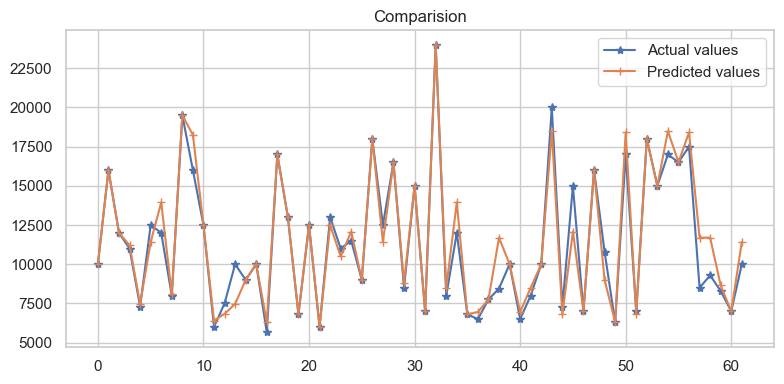

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(df_DT['Actual'], label='Actual values', marker='*')
plt.plot(df_DT['pred'], label='Predicted values', marker='+')
plt.title("Comparision")

plt.legend()
plt.tight_layout()

plt.show()

In [50]:
#calculate Result and  analysis

from sklearn.metrics import mean_squared_error, r2_score

mse_DT = mean_squared_error(y_test, y_pred_DT)
rmse_DT = np.sqrt(mse_DT)
r2_DT = r2_score(y_test, y_pred_DT)
cv_score_DT = np.mean(cross_val_score(model_DT, X, y, cv=5))

print(f"Decision Tree Regression- Mean Squared Error: {mse_DT}")
print(f"Decision Tree Regression - Root Mean Squared Error: {rmse_DT}")
print(f"Decision Tree Regression - R² Score: {r2_DT}")
print(f"Decision Tree Regression - CV Score: {cv_score_DT}")

Decision Tree Regression- Mean Squared Error: 1167936.491855242
Decision Tree Regression - Root Mean Squared Error: 1080.7111047154285
Decision Tree Regression - R² Score: 0.9357980661849487
Decision Tree Regression - CV Score: 0.5349157062294987


###a 6. Result Analysis and Recommendation

Linear Regression  Performance:
MSE  : 3529287.63
RMSE : 1878.64
R²   : 0.8060


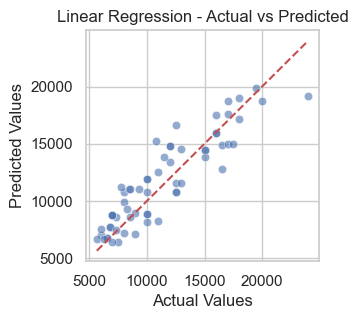

Random Forest Regression  Performance:
MSE  : 1280729.50
RMSE : 1131.69
R²   : 0.9296


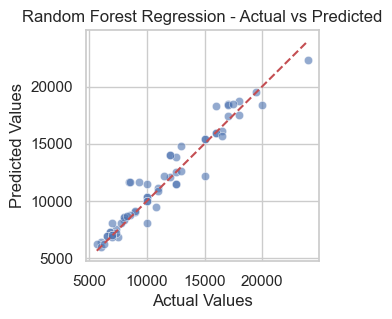

Gradient Boosting Regression  Performance:
MSE  : 1670850.47
RMSE : 1292.61
R²   : 0.9082


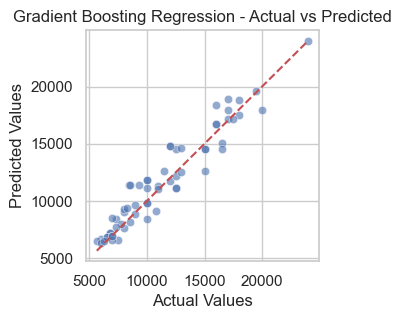

Decision Tree Regression  Performance:
MSE  : 1167936.49
RMSE : 1080.71
R²   : 0.9358


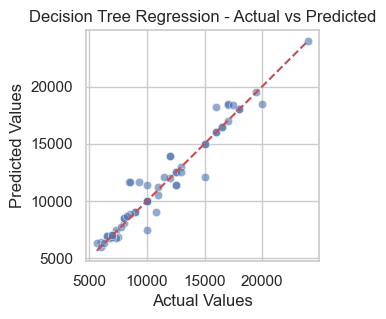

                          Model  R2 Score     RMSE  CV Score
3      Decision Tree Regression    0.9358  1080.71    0.5349
1      Random Forest Regression    0.9296  1131.69    0.7040
2  Gradient Boosting Regression    0.9082  1292.61    0.7801
0             Linear Regression    0.8060  1878.64    0.6479


In [51]:
#Code to Visualize Predictions vs Actuals
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_predictions(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(model_name," Performance:")
    print(f"MSE  : {mse:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"R²   : {r2:.4f}")
    plt.figure(figsize=(3,3))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} - Actual vs Predicted')
    plt.grid(True)
    plt.show()

# Assuming you have predictions for each model:
# y_pred_lr, y_pred_dt, y_pred_rf for Linear Regression, Decision Tree, Random Forest

plot_predictions(y_test, y_pred_LR, 'Linear Regression')
plot_predictions(y_test, y_pred_RF, 'Random Forest Regression')
plot_predictions(y_test, y_pred_GB, 'Gradient Boosting Regression')
plot_predictions(y_test, y_pred_DT, 'Decision Tree Regression')


results = []
results.append(['Linear Regression', round(r2_LR, 4), round(rmse_LR, 2), round(cv_score_LR, 4)])
results.append(['Random Forest Regression', round(r2_RF, 4), round(rmse_RF, 2), round(cv_score_RF, 4)])
results.append(['Gradient Boosting Regression', round(r2_GB, 4), round(rmse_GB, 2), round(cv_score_GB, 4)])
results.append(['Decision Tree Regression', round(r2_DT, 4), round(rmse_DT, 2), round(cv_score_DT, 4)])
# ======== Results Table ========
results_df = pd.DataFrame(results, columns=["Model", "R2 Score", "RMSE", "CV Score"])
results_df = results_df.sort_values(by="R2 Score", ascending=False)
print(results_df)

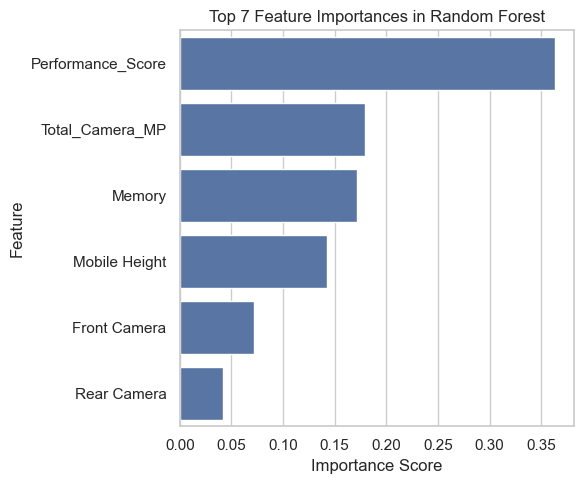

In [55]:
# Import Library
import seaborn as sns

# Get feature importances
importances = pd.Series(model_RF.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(6)  # top 15 for clarity

# Plot EDA
plt.figure(figsize=(6, 5))
sns.barplot(x=top_features, y=top_features.index)
plt.title("Top 7 Feature Importances in Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
